In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [66]:
from google.colab import files
uploaded=files.upload()

Saving blogs_categories.csv to blogs_categories (1).csv


In [67]:
# reading the dataset "blogs_categories"
df=pd.read_csv('blogs_categories.csv')
df

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\r\nPath: cantaloupe.sr...,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [68]:
# first 5 data from the dataset
df.head()

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\r\nPath: cantaloupe.sr...,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [69]:
#checking null values
df.isnull().sum()

Unnamed: 0    0
Data          0
Labels        0
dtype: int64

In [70]:
#creating a column for length of the data
df['len']=df['Data'].apply(len)
df

,Unnamed: 0,Data,Labels,len
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism,12731
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,33193
2,2,Newsgroups: alt.atheism\r\nPath: cantaloupe.sr...,alt.atheism,4654
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,2108
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,1375
...,...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,1838
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,2128
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,1650
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,2686


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'len'}>]], dtype=object)

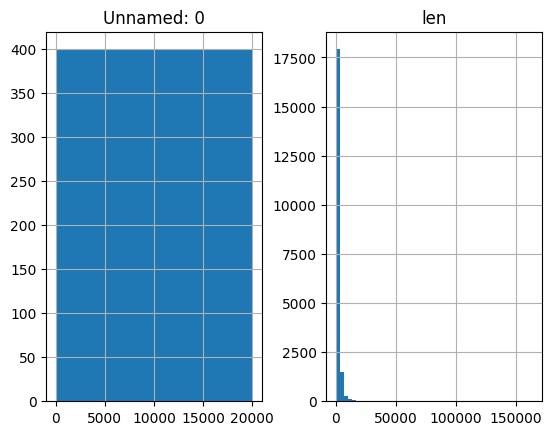

In [71]:
df.hist(bins=50)

array([[<Axes: title={'center': 'alt.atheism'}>,
        <Axes: title={'center': 'alt.atheism"'}>,
        <Axes: title={'center': 'comp.graphics'}>,
        <Axes: title={'center': 'comp.os.ms-windows.misc'}>,
        <Axes: title={'center': 'comp.sys.ibm.pc.hardware'}>],
       [<Axes: title={'center': 'comp.sys.mac.hardware'}>,
        <Axes: title={'center': 'comp.windows.x'}>,
        <Axes: title={'center': 'misc.forsale'}>,
        <Axes: title={'center': 'rec.autos'}>,
        <Axes: title={'center': 'rec.motorcycles'}>],
       [<Axes: title={'center': 'rec.sport.baseball'}>,
        <Axes: title={'center': 'rec.sport.hockey'}>,
        <Axes: title={'center': 'sci.crypt'}>,
        <Axes: title={'center': 'sci.electronics'}>,
        <Axes: title={'center': 'sci.med'}>],
       [<Axes: title={'center': 'sci.space'}>,
        <Axes: title={'center': 'soc.religion.christian'}>,
        <Axes: title={'center': 'talk.politics.guns'}>,
        <Axes: title={'center': 'talk.politic

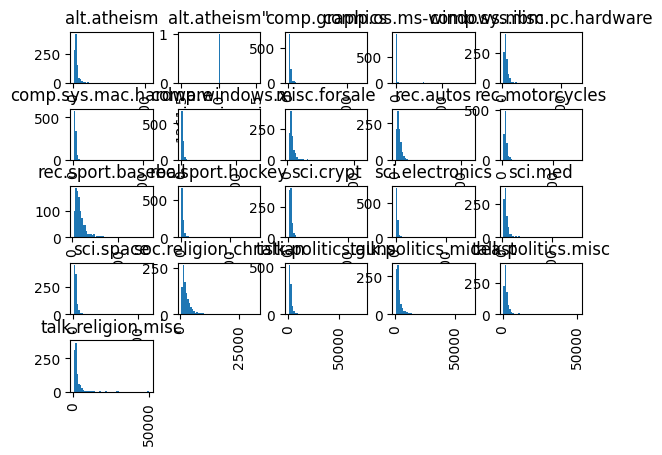

In [72]:
df.hist('len',by='Labels',bins=50)

In [73]:
df['len'].describe()

count     19997.000000
mean       2356.917338
std        3990.909014
min         355.000000
25%        1166.000000
50%        1635.000000
75%        2371.000000
max      163654.000000
Name: len, dtype: float64

In [74]:
import nltk

In [75]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [76]:
!pip install spacy

In [77]:
!pip install wordcloud

In [78]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [79]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [80]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [81]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [82]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stopwords_list = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stopwords_list]
    # Join tokens back into text
    text = ' '.join(tokens)
    return text

In [83]:
#Apply text preprocessing to the 'text' column
df['cleaned_text']=df['Data'].apply(preprocess_text)

In [84]:
#Feature extraction using TF-IDF
tfidf_vec=TfidfVectorizer(max_features=5000)
tfidf_vec

TfidfVectorizer(max_features=5000)

In [85]:
a=tfidf_vec.fit_transform(df['cleaned_text'])

In [86]:
a

<19997x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1823829 stored elements in Compressed Sparse Row format>

In [87]:
b=df['Labels']

In [88]:
b

0               alt.atheism
1               alt.atheism
2               alt.atheism
3               alt.atheism
4               alt.atheism
                ...        
19992    talk.religion.misc
19993    talk.religion.misc
19994    talk.religion.misc
19995    talk.religion.misc
19996    talk.religion.misc
Name: Labels, Length: 19997, dtype: object

In [89]:
#splitting the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.75,random_state=100)

In [90]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4999, 5000)
(4999,)
(14998, 5000)
(14998,)


In [91]:
#using NaiveBayes algorithm
naive_bayes=MultinomialNB()

In [92]:
naive_bayes.fit(x_train,y_train)

MultinomialNB()

In [93]:
# predicting the data
y_pred=naive_bayes.predict(x_test)

In [94]:
y_pred

array(['sci.med', 'talk.politics.misc', 'comp.sys.mac.hardware', ...,
       'comp.os.ms-windows.misc', 'rec.sport.hockey',
       'comp.sys.mac.hardware'], dtype='<U24')

In [95]:
#  finding performance metrics using accuracy score,precision,recall and f1 score
accuracy_score(y_test,y_pred)

0.8533137751700227

In [96]:
classification_report(y_test,y_pred)

'                          precision    recall  f1-score   support\n\n             alt.atheism       0.76      0.79      0.78       749\n            alt.atheism"       0.00      0.00      0.00         1\n           comp.graphics       0.82      0.84      0.83       741\n comp.os.ms-windows.misc       0.70      0.88      0.78       735\ncomp.sys.ibm.pc.hardware       0.77      0.79      0.78       750\n   comp.sys.mac.hardware       0.84      0.91      0.87       733\n          comp.windows.x       0.89      0.88      0.89       745\n            misc.forsale       0.87      0.83      0.85       762\n               rec.autos       0.90      0.87      0.89       753\n         rec.motorcycles       0.96      0.93      0.95       757\n      rec.sport.baseball       0.97      0.96      0.97       756\n        rec.sport.hockey       0.98      0.97      0.98       758\n               sci.crypt       0.93      0.95      0.94       741\n         sci.electronics       0.90      0.76      0.83    

In [97]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [98]:
!python -m nltk.downloader vader_lexicon

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [99]:
#sentiment Analysis
sent_analy=SentimentIntensityAnalyzer()

In [100]:
sentiments=[]
for text in df['Data']:
  sentiment_scr=sent_analy.polarity_scores(text)
  if sentiment_scr['compound']>0:
    sentiments.append('positive+ve')
  elif sentiment_scr['compound']<0:
    sentiments.append('negative-ve')
  else:
    sentiments.append('neutral')

In [101]:
# adding sentiments to the data
df['sentiment']=sentiments

In [102]:
#Examining the distribution of sentiments
sentiment_dist=df.groupby(['Labels','sentiment']).size().unstack(fill_value=0)
print("\n sentiment Distribution Across Categories:")
print(sentiment_dist)


 sentiment Distribution Across Categories:
sentiment                 negative-ve  neutral  positive+ve
Labels                                                     
alt.atheism                       379        8          612
alt.atheism"                        0        0            1
comp.graphics                     123       47          830
comp.os.ms-windows.misc           204       45          751
comp.sys.ibm.pc.hardware          218       19          763
comp.sys.mac.hardware             243       47          710
comp.windows.x                    226       40          734
misc.forsale                      126       70          804
rec.autos                         304       28          668
rec.motorcycles                   311       20          669
rec.sport.baseball                228       39          733
rec.sport.hockey                  259       16          725
sci.crypt                         300        7          693
sci.electronics                   178       36          

In [103]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [104]:
# Naive Bayes Classifier and performance metrics
accuracy_scr=accuracy_score(y_test,y_pred)
accuracy_scr

0.8533137751700227

In [105]:
precision_scr=precision_score(y_test,y_pred,average='weighted')
precision_scr

0.8571052651738537

In [106]:
recall_scr=recall_score(y_test,y_pred,average='weighted')
recall_scr

0.8533137751700227

In [107]:
f1_scr=f1_score(y_test,y_pred,average="weighted")
f1_scr

0.8514968233885296